### Clustering
##### Clustering is a process by which you collect a large number of data points into a smaller number of groups, based on the distances between them. It is useful in cases where the volumes of data are large and you want to extract some  figures of interest. It is a type of _unsupervised learning_.

#### A common use for clustering is identifying distinct subsets of a population, e,g in a census.

#### There are a number of algorithms available for performing clustering but the simplest and most common is _k-means clustering_.

#### It works by taking the n-dimensional data provided, $X$ and randomly place $k$ seed points in the field which represent the centres of the initial clusters.

#### 1. It then iterates over every datapoint in $X$ and assigns each to be associated with whichever cluster centre is the closest.
#### 2. Once all points have been associated with a cluster, it then iterates over each cluster and calculates the new mean of the clusterto be the centroid of all the points assigned to it.

#### Steps 1 and 2 are repeated until te algorithm converges on a result.

In [2]:
from sklearn.datasets import make_blobs

In [46]:
data, true_labels = make_blobs(n_samples = 500, centers = 4, random_state = 4)

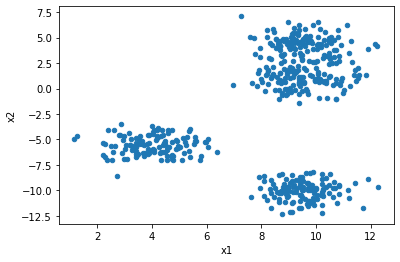

In [47]:
from pandas import DataFrame

points = DataFrame(data, columns = ["x1", "x2"])
points.plot.scatter("x1", "x2")

In [48]:
from sklearn.cluster import KMeans # Data Analysis, called k-means cause you decide how many clusters you want to analyze

kmeans = KMeans(n_clusters = 4).fit(points)

In [49]:
cluster_centers = DataFrame(kmeans.cluster_centers_, columns = ["x1", "x2"]) # Underscore tells us that it is a computer generated DataFrame

cluster_centers

,x1,x2
0,4.037597,-5.560169
1,9.553161,4.371345
2,9.544260,-10.027099
3,9.484700,0.873686


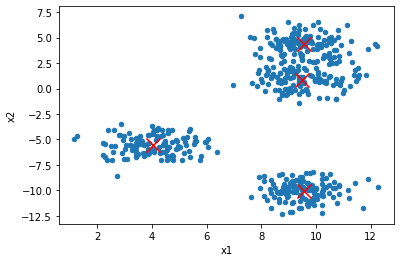

In [50]:
ax = points.plot.scatter("x1", "x2")
cluster_centers.plot.scatter("x1", "x2", ax = ax, c = "red", s = 200, marker = "x")

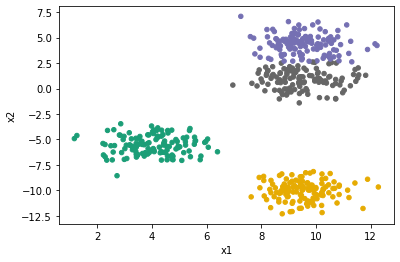

In [51]:
kmeans.labels_
points.plot.scatter("x1", "x2", c = kmeans.labels_, colormap = "Dark2", colorbar = False)

In [52]:
from sklearn.datasets import load_iris

iris = DataFrame(load_iris().data, columns = load_iris().feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
num_iris_species = len(load_iris().target_names)
num_iris_species

3

In [54]:
kmeans = KMeans(n_clusters = num_iris_species).fit(iris)

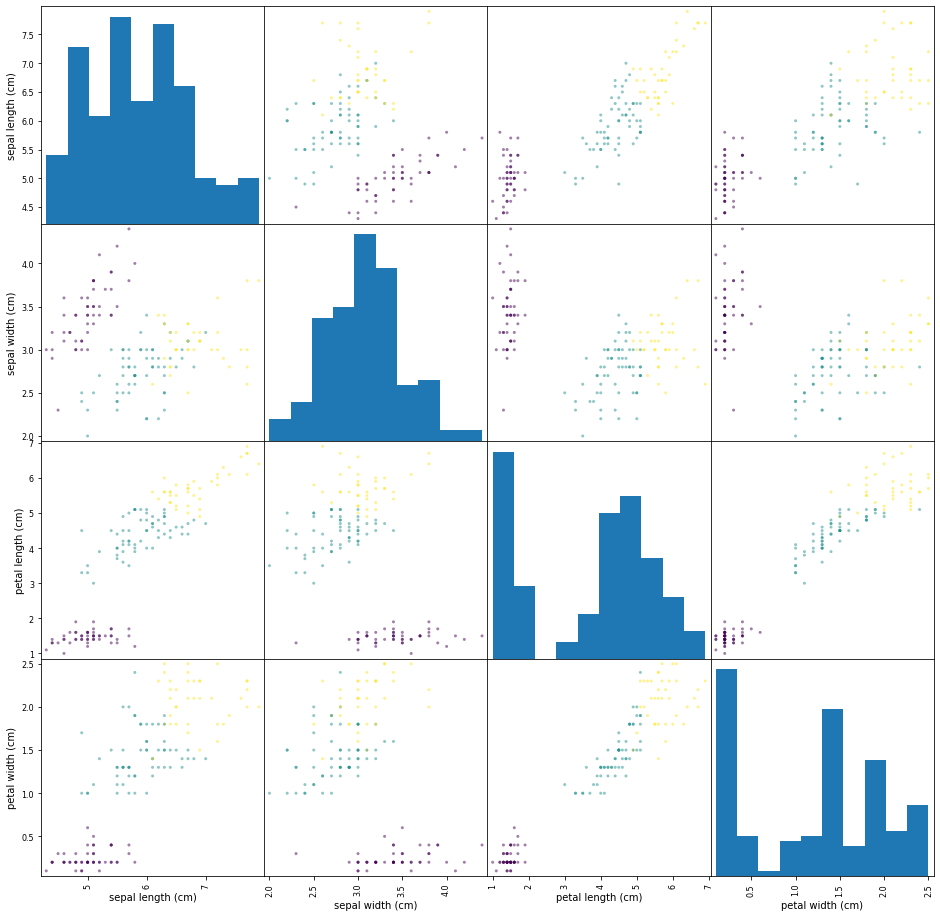

In [55]:
from pandas.plotting import scatter_matrix
a = scatter_matrix(iris, figsize = (16, 16), c = kmeans.labels_)

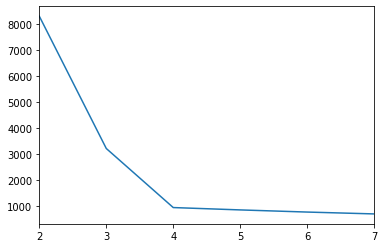

In [56]:
from pandas import Series, DataFrame
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples = 500, centers = 4, random_state = 6)
points = DataFrame(data, columns = ["x", "y"])

inertia_values = []
r = pd.RangeIndex(2, 8)
for n_clusters in r:
    kmeans = KMeans(n_clusters = n_clusters).fit(points)
    inertia_values.append(kmeans.inertia_)
    
inertia = Series(inertia_values, name = "inertia", index = r)
inertia.plot()

### Other Clustering Algorithms

#### There are different clusteing algorithms beyond k-means. scikit-learn comes with many.
#### k-means famously has problems with clusters which are elongated in some direction as it assumes sphericity.